<a href="https://colab.research.google.com/github/dpatinoecheverri/ENV717_S23/blob/main/A3HintColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3 - Hint

### This code shows a way to plot the power supply curve with different markers for fuel types. It also shows how to plot vertical lines to represent demand.

#### For the supply, it reads plant data from excel (a small subset of data previously taken from eGRID) for illustrative purposes.   It creates four different data frames - one for each fuel type- and then plots them in the same graph.

### For the demand it also reads three demand levels from excel.

#### This is a simple way that works well for the purposes of A3. However, there is a more efficient way that takes better advantage of matplotlib capabilities. We will present that in the A3 solution.

## if using colab then mount the drive

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read an excel sheet with data on power plants's capacity and cost

In [7]:
# Change the working directory to the folder where all the colab notebooks for this class will be stored
os.chdir('/content/drive/MyDrive/Colab Notebooks/ENV717-S2023')

In [8]:
##################################################################################################################
## 1. Read the data on power plants from the xls file into a dataframe (df) using pd.read_excel                  #
##   -specify that we are reading the sheet "Supply"                                                             #
##   -Read the first row (i.e., row 0) as the headers                                                            #
## 2. See the columns in this spreadsheet by printing the first five rows                                        #
##################################################################################################################
df_plants=pd.read_excel("A3HintData.xlsx","Supply",header=0) #1.
df_plants.head(5) #2.

,Plant Number,Plant primary fuel category,Plant nameplate capacity (MW),FuelCost($/MWh)
0,1,OIL,1.8,636.510000
1,2,OIL,3.6,260.171143
2,3,GAS,1425.1,39.346772
3,4,COAL,2491.2,76.429286
4,5,COAL,52.5,14.260229


In [9]:
# *see how many rows in the dataframe df_demand - not counting the row with the headers
len(df_plants)

64

In [11]:
#sort the plants by merit order (i.e., from least fuel cost to higher)
df_plants=df_plants.sort_values('FuelCost($/MWh)')
df_plants.head(5) #2.

,Plant Number,Plant primary fuel category,Plant nameplate capacity (MW),FuelCost($/MWh)
44,45,GAS,67.8,3.146548
4,5,COAL,52.5,14.260229
19,20,GAS,543.9,37.926062
2,3,GAS,1425.1,39.346772
12,13,GAS,9.2,39.364627


In [13]:
# Now add a new column to calculate the cumulative capacity. Initialize it at zero for all the rows
df_plants['CumCapacity[MW]']=0
df_plants.head(5)

,Plant Number,Plant primary fuel category,Plant nameplate capacity (MW),FuelCost($/MWh),CumCapacity[MW]
44,45,GAS,67.8,3.146548,0
4,5,COAL,52.5,14.260229,0
19,20,GAS,543.9,37.926062,0
2,3,GAS,1425.1,39.346772,0
12,13,GAS,9.2,39.364627,0


In [14]:
# Make the first row of the CumCapacity column to be equal to the Nameplate capacity of that plant (in that row)
df_plants.iloc[0,4]=df_plants.iloc[0,2]
df_plants.head(5)

,Plant Number,Plant primary fuel category,Plant nameplate capacity (MW),FuelCost($/MWh),CumCapacity[MW]
44,45,GAS,67.8,3.146548,67.8
4,5,COAL,52.5,14.260229,0.0
19,20,GAS,543.9,37.926062,0.0
2,3,GAS,1425.1,39.346772,0.0
12,13,GAS,9.2,39.364627,0.0


In [15]:
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,len(df_plants)):  
                df_plants.iloc[i,4]=df_plants.iloc[i-1,4]+df_plants.iloc[i,2]
df_plants.head(5)

,Plant Number,Plant primary fuel category,Plant nameplate capacity (MW),FuelCost($/MWh),CumCapacity[MW]
44,45,GAS,67.8,3.146548,67.8
4,5,COAL,52.5,14.260229,120.3
19,20,GAS,543.9,37.926062,664.2
2,3,GAS,1425.1,39.346772,2089.3
12,13,GAS,9.2,39.364627,2098.5


In [17]:
# Lets find all the fuel types in this dataset by looking at the unique values in the fuel column
df_plants["Plant primary fuel category"].unique()

array(['GAS', 'COAL', 'OIL', 'HYDRO'], dtype=object)

In [18]:
# One way to differentiate the four fuel types in the dataset is by creating four different data frames
# We will later plot each on the same plot - with different markers
coalSorted=df_plants[df_plants["Plant primary fuel category"]=="COAL"]
gasSorted=df_plants[df_plants["Plant primary fuel category"]=="GAS"]
oilSorted=df_plants[df_plants["Plant primary fuel category"]=="OIL"]
hydroSorted=df_plants[df_plants["Plant primary fuel category"]=="HYDRO"]

In [19]:
# Let's confirm that the coal df is what we want
coalSorted.head(5)

,Plant Number,Plant primary fuel category,Plant nameplate capacity (MW),FuelCost($/MWh),CumCapacity[MW]
4,5,COAL,52.5,14.260229,120.3
40,41,COAL,56.0,45.975923,9364.9
63,64,COAL,103.8,72.798346,13610.8
9,10,COAL,2540.5,75.867640,16950.5
3,4,COAL,2491.2,76.429286,19441.7


## Now plot each df for each fuel type - add different markers, labels and a caption

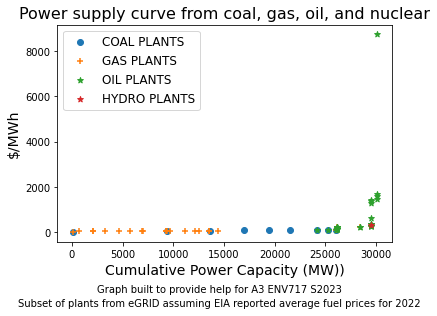

In [20]:
plt.scatter(coalSorted["CumCapacity[MW]"],coalSorted["FuelCost($/MWh)"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted["CumCapacity[MW]"],gasSorted["FuelCost($/MWh)"],marker="+",label="GAS PLANTS")
plt.scatter(oilSorted["CumCapacity[MW]"],oilSorted["FuelCost($/MWh)"],marker="*",label="OIL PLANTS")
plt.scatter(hydroSorted["CumCapacity[MW]"],hydroSorted["FuelCost($/MWh)"],marker="*",label="HYDRO PLANTS")
plt.title("Power supply curve from coal, gas, oil, and nuclear",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)# adjust the font of legends "coal plants", "gas plants", etc 
#Add a caption that makes this plot a stand-alone piece of information
txt="Graph built to provide help for A3 ENV717 S2023"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2="Subset of plants from eGRID assuming EIA reported average fuel prices for 2022"
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

## Plot the  vertical demand lines

In [22]:
##################################################################################################################
## 1. Read the demand xls file into a dataframe (df) using pd.read_excel
##   -specify that we are reading the sheet "Demand"
##   -Read the first row (i.e., row 0) as the headers                                                            #
## 2. See the columns in this spreadsheet by printing the first five rows                                                #
###################################################################################################################
df_demand=pd.read_excel("A3HintData.xlsx","Demand",header=0) #1.
df_demand.head(5) #2.

,Demand Level,Demand(MW)
0,1,5000
1,2,20000
2,3,29000


### Plot the vertical lines using plt.axvline

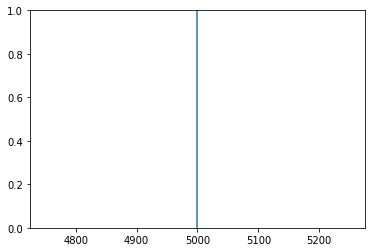

In [23]:
#to plot a vertical line use plt.axvline.
plt.axvline(x=df_demand.iloc[0,1]) # Plot the vertical line X=5000, since 5000 is the value in the first row, second column 

## Now put the supply and demand curves together

<function matplotlib.pyplot.show(*args, **kw)>

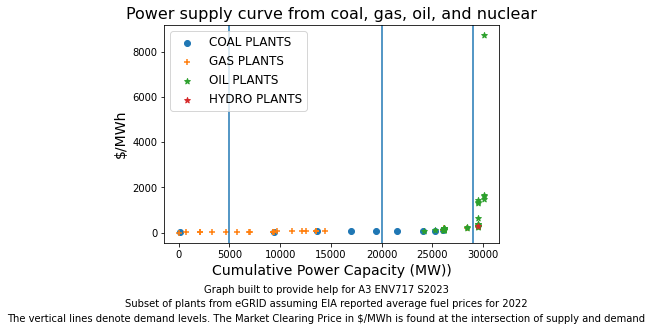

In [24]:
#Plot again the supply curves
plt.scatter(coalSorted["CumCapacity[MW]"],coalSorted["FuelCost($/MWh)"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted["CumCapacity[MW]"],gasSorted["FuelCost($/MWh)"],marker="+",label="GAS PLANTS")
plt.scatter(oilSorted["CumCapacity[MW]"],oilSorted["FuelCost($/MWh)"],marker="*",label="OIL PLANTS")
plt.scatter(hydroSorted["CumCapacity[MW]"],hydroSorted["FuelCost($/MWh)"],marker="*",label="HYDRO PLANTS")
plt.title("Power supply curve from coal, gas, oil, and nuclear",fontsize=16) # create title
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
#Add a caption that makes this plot a stand-alone piece of information
txt="Graph built to provide help for A3 ENV717 S2023"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2="Subset of plants from eGRID assuming EIA reported average fuel prices for 2022"
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)
plt.axvline(x=df_demand.iloc[0,1]) # Plot the first vertical line (i.e.,the level in row zero
plt.axvline(x=df_demand.iloc[1,1]) # Plot the second vertical line
plt.axvline(x=df_demand.iloc[2,1]) # Plot the third vertical line
## Add a note on the demands in the caption
txt3="The vertical lines denote demand levels. The Market Clearing Price in $/MWh is found at the intersection of supply and demand"
plt.figtext(0.5, -0.15, txt3, wrap=True, horizontalalignment='center', fontsize=10)
# now show the plot
plt.show

## Optional: Repeat the supply plot but this time remove an outlier plant with significantly larger marginal costs

In [25]:
#Let's remove the oil last two plants in the merit order so we can see the distribution of prices more clearly without this outlier
# This is optional
oilSorted=oilSorted.iloc[0:len(oilSorted)-1]

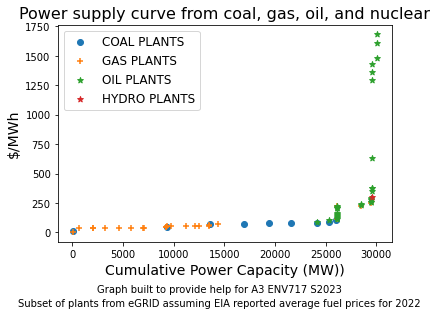

In [26]:
#Plot again
plt.scatter(coalSorted["CumCapacity[MW]"],coalSorted["FuelCost($/MWh)"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted["CumCapacity[MW]"],gasSorted["FuelCost($/MWh)"],marker="+",label="GAS PLANTS")
plt.scatter(oilSorted["CumCapacity[MW]"],oilSorted["FuelCost($/MWh)"],marker="*",label="OIL PLANTS")
plt.scatter(hydroSorted["CumCapacity[MW]"],hydroSorted["FuelCost($/MWh)"],marker="*",label="HYDRO PLANTS")
plt.title("Power supply curve from coal, gas, oil, and nuclear",fontsize=16) # create title
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)
#Add a caption that makes this plot a stand-alone piece of information
txt="Graph built to provide help for A3 ENV717 S2023"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
txt2="Subset of plants from eGRID assuming EIA reported average fuel prices for 2022"
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()